In [4]:
import pandas as pd
import json
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_json("fiocruz.json", lines = True)

In [9]:
display(df)

title   language  \
0       Protein synthesis inhibitory activity in cultu...     Inglês   
1       Principais obstáculos que dificultam a inovaçã...  Português   
2       Diversidade de cepas de Stenotrophomonas malto...  Português   
3       Avaliação da diversidade microbiana presente e...  Português   
4       Accuracy And Interobserver Variation Of Three ...     Inglês   
...                                                   ...        ...   
102176  Soroprevalência da infecção por hantavírus em ...  Português   
102177  Development and evaluation of a single tube ne...     Inglês   
102178  Seroprevalence of hantavirus and Yersinia pest...  Português   
102179  Relação genética entre as cepas de Yersinia pe...  Português   
102180  Determination of hantavirus infection in wild ...  Português   

       publicationDate volume series startPage endPage             type  \
0                 2003     37              138     143  journal article   
1                 2016      4      2         2       7  journal article   
2                 2021     23     45       129     141  journal article   
3                 2017     98      1      1919    1937  journal article   
4                 2013     32      6       686     687  journal article   
...                ...    ...    ...       ...     ...              ...   
102176            2010     39      1         1       6  journal article   
102177            2007    603     00       351     359  journal article   
102178            2013     46      4       490     492  journal article   
102179            2014     11      2         7      13  journal article   
102180            2008    xxx              xxx          journal article   

                                                  keyword  \
0       [antimetabolic activity, actinomycetes, biotec...   
1       [Inovação, Indústria Farmacêutica, Laboratório...   
2       [Epidemiologia, MLST, Caracterização molecular...   
3       [água purificada, Controle microbiológico, Del...   
4       [validation study, sensitivity, specificity, s...   
...                                                   ...   
102176     [Roedores, Hantavirus, Peste, Soroprevalência]   
102177                                                 []   
102178                                                 []   
102179                                                 []   
102180                [Diagnóstico, Hantavirus, Roedores]   

                            researchArea.cnpq  \
0                       [CIENCIAS_BIOLOGICAS]   
1                                          []   
2        [CIENCIAS_BIOLOGICAS, Saúde Pública]   
3          [CIENCIAS_DA_SAUDE, Microbiologia]   
4       [doenças infecciosas, Saúde Coletiva]   
...                                       ...   
102176                                     []   
102177                                     []   
102178                                     []   
102179                                     []   
102180                                     []   

                                              resourceUrl  \
0                                                           
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                           
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                                      
102177                                                      
102178                                                      
102179                        doi:10.7594/revbio.11.02.02   
102180                                                      

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title'

In [10]:
display(df['authors'])

0         [{'name': 'Sheila Albert dos Reis', 'ordemAuto...
1         [{'name': 'Marcus Vinícius Lima do Couto', 'or...
2         [{'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'or...
3         [{'name': 'Luciana Veloso da Costa', 'ordemAut...
4         [{'name': 'Dulce Helena Gonçalves Orofino', 'o...
                                ...                        
102176    [{'name': 'Gerlane Tavares de Souza Chioratto'...
102177    [{'name': 'Gerlane Tavares de Souza Chioratto'...
102178    [{'name': 'COSTA, Erika', 'ordemAutoria': '1',...
102179    [{'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutori...
102180    [{'name': 'Marise Sobreira', 'ordemAutoria': '...
Name: authors, Length: 102181, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              102181 non-null  object
 1   language           102181 non-null  object
 2   publicationDate    102181 non-null  object
 3   volume             102181 non-null  object
 4   series             102181 non-null  object
 5   startPage          102181 non-null  object
 6   endPage            102181 non-null  object
 7   type               102181 non-null  object
 8   keyword            102181 non-null  object
 9   researchArea.cnpq  102181 non-null  object
 10  resourceUrl        102181 non-null  object
 11  PublisherJournal   102057 non-null  object
 12  authors            102181 non-null  object
 13  identifier.doi     57209 non-null   object
dtypes: object(14)
memory usage: 10.9+ MB


In [12]:

df.isna().sum()

title                    0
language                 0
publicationDate          0
volume                   0
series                   0
startPage                0
endPage                  0
type                     0
keyword                  0
researchArea.cnpq        0
resourceUrl              0
PublisherJournal       124
authors                  0
identifier.doi       44972
dtype: int64

In [13]:
df.isna().head()

title  language  publicationDate  volume  series  startPage  endPage  \
0  False     False            False   False   False      False    False   
1  False     False            False   False   False      False    False   
2  False     False            False   False   False      False    False   
3  False     False            False   False   False      False    False   
4  False     False            False   False   False      False    False   

    type  keyword  researchArea.cnpq  resourceUrl  PublisherJournal  authors  \
0  False    False              False        False             False    False   
1  False    False              False        False             False    False   
2  False    False              False        False             False    False   
3  False    False              False        False             False    False   
4  False    False              False        False             False    False   

   identifier.doi  
0            True  
1           False  
2           False  
3            True  
4           False

In [14]:

df = df.drop('volume', axis =1)
df = df.drop('series', axis =1)
df = df.drop('startPage', axis =1)
df = df.drop('endPage', axis =1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              102181 non-null  object
 1   language           102181 non-null  object
 2   publicationDate    102181 non-null  object
 3   type               102181 non-null  object
 4   keyword            102181 non-null  object
 5   researchArea.cnpq  102181 non-null  object
 6   resourceUrl        102181 non-null  object
 7   PublisherJournal   102057 non-null  object
 8   authors            102181 non-null  object
 9   identifier.doi     57209 non-null   object
dtypes: object(10)
memory usage: 7.8+ MB


In [16]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['type'])
df['type']=labelEncoder.transform(df['type'])
labelEncoder.fit(df['language'])
df['language']=labelEncoder.transform(df['language'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              102181 non-null  object
 1   language           102181 non-null  int64 
 2   publicationDate    102181 non-null  object
 3   type               102181 non-null  int64 
 4   keyword            102181 non-null  object
 5   researchArea.cnpq  102181 non-null  object
 6   resourceUrl        102181 non-null  object
 7   PublisherJournal   102057 non-null  object
 8   authors            102181 non-null  object
 9   identifier.doi     57209 non-null   object
dtypes: int64(2), object(8)
memory usage: 7.8+ MB


In [17]:
df

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

       publicationDate  type  \
0                 2003     0   
1                 2016     0   
2                 2021     0   
3                 2017     0   
4                 2013     0   
...                ...   ...   
102176            2010     0   
102177            2007     0   
102178            2013     0   
102179            2014     0   
102180            2008     0   

                                                  keyword  \
0       [antimetabolic activity, actinomycetes, biotec...   
1       [Inovação, Indústria Farmacêutica, Laboratório...   
2       [Epidemiologia, MLST, Caracterização molecular...   
3       [água purificada, Controle microbiológico, Del...   
4       [validation study, sensitivity, specificity, s...   
...                                                   ...   
102176     [Roedores, Hantavirus, Peste, Soroprevalência]   
102177                                                 []   
102178                                                 []   
102179                                                 []   
102180                [Diagnóstico, Hantavirus, Roedores]   

                            researchArea.cnpq  \
0                       [CIENCIAS_BIOLOGICAS]   
1                                          []   
2        [CIENCIAS_BIOLOGICAS, Saúde Pública]   
3          [CIENCIAS_DA_SAUDE, Microbiologia]   
4       [doenças infecciosas, Saúde Coletiva]   
...                                       ...   
102176                                     []   
102177                                     []   
102178                                     []   
102179                                     []   
102180                                     []   

                                              resourceUrl  \
0                                                           
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                           
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                                      
102177                                                      
102178                                                      
102179                        doi:10.7594/revbio.11.02.02   
102180                                                      

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

                          

In [18]:
df.type.sum()

0

In [19]:
#df['publicationDate'] = df['publicationDate'].convert_dtypes(str)
df['publicationDate'] = pd.to_numeric(df['publicationDate'], errors='coerce').convert_dtypes()
df

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type  \
0                  2003     0   
1                  2016     0   
2                  2021     0   
3                  2017     0   
4                  2013     0   
...                 ...   ...   
102176             2010     0   
102177             2007     0   
102178             2013     0   
102179             2014     0   
102180             2008     0   

                                                  keyword  \
0       [antimetabolic activity, actinomycetes, biotec...   
1       [Inovação, Indústria Farmacêutica, Laboratório...   
2       [Epidemiologia, MLST, Caracterização molecular...   
3       [água purificada, Controle microbiológico, Del...   
4       [validation study, sensitivity, specificity, s...   
...                                                   ...   
102176     [Roedores, Hantavirus, Peste, Soroprevalência]   
102177                                                 []   
102178                                                 []   
102179                                                 []   
102180                [Diagnóstico, Hantavirus, Roedores]   

                            researchArea.cnpq  \
0                       [CIENCIAS_BIOLOGICAS]   
1                                          []   
2        [CIENCIAS_BIOLOGICAS, Saúde Pública]   
3          [CIENCIAS_DA_SAUDE, Microbiologia]   
4       [doenças infecciosas, Saúde Coletiva]   
...                                       ...   
102176                                     []   
102177                                     []   
102178                                     []   
102179                                     []   
102180                                     []   

                                              resourceUrl  \
0                                                           
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                           
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                                      
102177                                                      
102178                                                      
102179                        doi:10.7594/revbio.11.02.02   
102180                                                      

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

              

In [20]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              102181 non-null  object
 1   language           102181 non-null  int64 
 2   publicationDate    102169 non-null  Int64 
 3   type               102181 non-null  int64 
 4   keyword            102181 non-null  object
 5   researchArea.cnpq  102181 non-null  object
 6   resourceUrl        102181 non-null  object
 7   PublisherJournal   102057 non-null  object
 8   authors            102181 non-null  object
 9   identifier.doi     57209 non-null   object
dtypes: Int64(1), int64(2), object(7)
memory usage: 7.9+ MB


In [21]:
df['publicationDate'].fillna(df['publicationDate'].median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              102181 non-null  object
 1   language           102181 non-null  int64 
 2   publicationDate    102181 non-null  Int64 
 3   type               102181 non-null  int64 
 4   keyword            102181 non-null  object
 5   researchArea.cnpq  102181 non-null  object
 6   resourceUrl        102181 non-null  object
 7   PublisherJournal   102057 non-null  object
 8   authors            102181 non-null  object
 9   identifier.doi     57209 non-null   object
dtypes: Int64(1), int64(2), object(7)
memory usage: 7.9+ MB


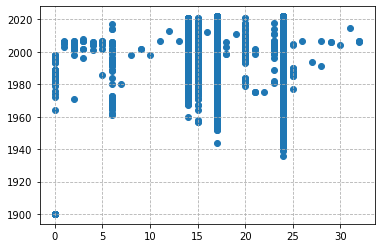

In [22]:
plt.scatter(df['language'], df['publicationDate'])
plt.grid(linestyle = '--')

In [23]:
df['language'].unique()

array([17, 24,  4,  5,  3, 14, 28,  0, 15, 20, 32,  6, 23,  2, 11, 18, 21,
       22, 13,  9,  1, 26, 19, 29, 30, 31,  8,  7, 12, 16, 25, 27, 10])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              102181 non-null  object
 1   language           102181 non-null  int64 
 2   publicationDate    102181 non-null  Int64 
 3   type               102181 non-null  int64 
 4   keyword            102181 non-null  object
 5   researchArea.cnpq  102181 non-null  object
 6   resourceUrl        102181 non-null  object
 7   PublisherJournal   102057 non-null  object
 8   authors            102181 non-null  object
 9   identifier.doi     57209 non-null   object
dtypes: Int64(1), int64(2), object(7)
memory usage: 7.9+ MB


In [25]:
#df['keyword'] = df['keyword'].convert_dtypes(str)
df['keyword'] = df['keyword'].astype("string")
df['keyword']= df.apply(lambda x: str(x['keyword']).replace("[",'').replace(']',''), axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              102181 non-null  object
 1   language           102181 non-null  int64 
 2   publicationDate    102181 non-null  Int64 
 3   type               102181 non-null  int64 
 4   keyword            102181 non-null  object
 5   researchArea.cnpq  102181 non-null  object
 6   resourceUrl        102181 non-null  object
 7   PublisherJournal   102057 non-null  object
 8   authors            102181 non-null  object
 9   identifier.doi     57209 non-null   object
dtypes: Int64(1), int64(2), object(7)
memory usage: 7.9+ MB


title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type  \
0                  2003     0   
1                  2016     0   
2                  2021     0   
3                  2017     0   
4                  2013     0   
...                 ...   ...   
102176             2010     0   
102177             2007     0   
102178             2013     0   
102179             2014     0   
102180             2008     0   

                                                  keyword  \
0       'antimetabolic activity', 'actinomycetes', 'bi...   
1       'Inovação', 'Indústria Farmacêutica', 'Laborat...   
2       'Epidemiologia', 'MLST', 'Caracterização molec...   
3       'água purificada', 'Controle microbiológico', ...   
4       'validation study', 'sensitivity', 'specificit...   
...                                                   ...   
102176  'Roedores', 'Hantavirus', 'Peste', 'Soropreval...   
102177                                                      
102178                                                      
102179                                                      
102180            'Diagnóstico', 'Hantavirus', 'Roedores'   

                            researchArea.cnpq  \
0                       [CIENCIAS_BIOLOGICAS]   
1                                          []   
2        [CIENCIAS_BIOLOGICAS, Saúde Pública]   
3          [CIENCIAS_DA_SAUDE, Microbiologia]   
4       [doenças infecciosas, Saúde Coletiva]   
...                                       ...   
102176                                     []   
102177                                     []   
102178                                     []   
102179                                     []   
102180                                     []   

                                              resourceUrl  \
0                                                           
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                           
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                                      
102177                                                      
102178                                                      
102179                        doi:10.7594/revbio.11.02.02   
102180                                                      

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

              

In [26]:
df['keyword'].str.split(',',expand = True)


0                           1   \
0       'antimetabolic activity'             'actinomycetes'   
1                     'Inovação'    'Indústria Farmacêutica'   
2                'Epidemiologia'                      'MLST'   
3              'água purificada'   'Controle microbiológico'   
4             'validation study'               'sensitivity'   
...                          ...                         ...   
102176                'Roedores'                'Hantavirus'   
102177                                                  None   
102178                                                  None   
102179                                                  None   
102180             'Diagnóstico'                'Hantavirus'   

                                 2                                3   \
0                   'biotechnology'         'eukaryotic translation'   
1           'Laboratórios oficiais'                             None   
2        'Caracterização molecular'   'Stenotrophomonas maltophilia'   
3             'Delftia acidovorans'         'Indústria Farmacêutica'   
4                     'specificity'      'streptococcal pharyngitis'   
...                             ...                              ...   
102176                      'Peste'                'Soroprevalência'   
102177                         None                             None   
102178                         None                             None   
102179                         None                             None   
102180                   'Roedores'                             None   

                              4     5     6     7     8     9     10    11  \
0        'translation inhibitor'  None  None  None  None  None  None  None   
1                           None  None  None  None  None  None  None  None   
2                           None  None  None  None  None  None  None  None   
3                 'MALDI-TOF MS'  None  None  None  None  None  None  None   
4              'rheumatic fever'  None  None  None  None  None  None  None   
...                          ...   ...   ...   ...   ...   ...   ...   ...   
102176                      None  None  None  None  None  None  None  None   
102177                      None  None  None  None  None  None  None  None   
102178                      None  None  None  None  None  None  None  None   
102179                      None  None  None  None  None  None  None  None   
102180                      None  None  None  None  None  None  None  None   

          12    13    14    15    16    17    18  
0       None  None  None  None  None  None  None  
1       None  None  None  None  None  None  None  
2       None  None  None  None  None  None  None  
3       None  None  None  None  None  None  None  
4       None  None  None  None  None  None  None  
...      ...   ...   ...   ...   ...   ...   ...  
102176  None  None  None  None  None  None  None  
102177  None  None  None  None  None  None  None  
102178  None  None  None  None  None  None  None  
102179  None  None  None  None  None  None  None  
102180  None  None  None  None  None  None  None  

[102181 rows x 19 columns]

In [27]:
df[['keyword1', 'keyword2', 'keyword3', 'keyword4', 'keyword5']] = df['keyword'].str.split(',',expand = True, n = 4)

In [28]:
df

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type  \
0                  2003     0   
1                  2016     0   
2                  2021     0   
3                  2017     0   
4                  2013     0   
...                 ...   ...   
102176             2010     0   
102177             2007     0   
102178             2013     0   
102179             2014     0   
102180             2008     0   

                                                  keyword  \
0       'antimetabolic activity', 'actinomycetes', 'bi...   
1       'Inovação', 'Indústria Farmacêutica', 'Laborat...   
2       'Epidemiologia', 'MLST', 'Caracterização molec...   
3       'água purificada', 'Controle microbiológico', ...   
4       'validation study', 'sensitivity', 'specificit...   
...                                                   ...   
102176  'Roedores', 'Hantavirus', 'Peste', 'Soropreval...   
102177                                                      
102178                                                      
102179                                                      
102180            'Diagnóstico', 'Hantavirus', 'Roedores'   

                            researchArea.cnpq  \
0                       [CIENCIAS_BIOLOGICAS]   
1                                          []   
2        [CIENCIAS_BIOLOGICAS, Saúde Pública]   
3          [CIENCIAS_DA_SAUDE, Microbiologia]   
4       [doenças infecciosas, Saúde Coletiva]   
...                                       ...   
102176                                     []   
102177                                     []   
102178                                     []   
102179                                     []   
102180                                     []   

                                              resourceUrl  \
0                                                           
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                           
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                                      
102177                                                      
102178                                                      
102179                        doi:10.7594/revbio.11.02.02   
102180                                                      

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

              

In [29]:
df = df.drop('keyword', axis =1)

In [30]:
df

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type                      researchArea.cnpq  \
0                  2003     0                  [CIENCIAS_BIOLOGICAS]   
1                  2016     0                                     []   
2                  2021     0   [CIENCIAS_BIOLOGICAS, Saúde Pública]   
3                  2017     0     [CIENCIAS_DA_SAUDE, Microbiologia]   
4                  2013     0  [doenças infecciosas, Saúde Coletiva]   
...                 ...   ...                                    ...   
102176             2010     0                                     []   
102177             2007     0                                     []   
102178             2013     0                                     []   
102179             2014     0                                     []   
102180             2008     0                                     []   

                                              resourceUrl  \
0                                                           
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                           
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                                      
102177                                                      
102178                                                      
102179                        doi:10.7594/revbio.11.02.02   
102180                                                      

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

                                                  authors  \
0       [{'name': 'Sheila Albert dos Reis', 'ordemAuto...   
1       [{'name': 'Marcus Vinícius Lima do Couto', 'or...   
2       [{'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'or...   
3       [{'name': 'Luciana Veloso da Costa', 'ordemAut...   
4       [{'name': 'Dulce Helena Gonçalves Orofino', 'o...   
...                                                   ...   
102176  [{'name': 'Gerlane Tavares de Souza Chioratto'...   
102177  [{'name': 'Gerlane Tavares de Souza Chioratto'...   
102178  [{'name': 'COSTA, Erika', 'ordemAutoria': '1',...   
102179  [{'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutori...   
102180  [{'name': 'Marise Sobreira', 'ordemAutoria': '...   

                      identifier.doi                  keyword1  \
0                                NaN  'antimetabolic activity'   
1  

In [31]:
df['researchArea.cnpq'] = df['researchArea.cnpq'].astype("string")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              102181 non-null  object
 1   language           102181 non-null  int64 
 2   publicationDate    102181 non-null  Int64 
 3   type               102181 non-null  int64 
 4   researchArea.cnpq  102181 non-null  string
 5   resourceUrl        102181 non-null  object
 6   PublisherJournal   102057 non-null  object
 7   authors            102181 non-null  object
 8   identifier.doi     57209 non-null   object
 9   keyword1           102181 non-null  object
 10  keyword2           45162 non-null   object
 11  keyword3           38006 non-null   object
 12  keyword4           22048 non-null   object
 13  keyword5           11152 non-null   object
dtypes: Int64(1), int64(2), object(10), string(1)
memory usage: 11.0+ MB


title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type                          researchArea.cnpq  \
0                  2003     0                    ['CIENCIAS_BIOLOGICAS']   
1                  2016     0                                         []   
2                  2021     0   ['CIENCIAS_BIOLOGICAS', 'Saúde Pública']   
3                  2017     0     ['CIENCIAS_DA_SAUDE', 'Microbiologia']   
4                  2013     0  ['doenças infecciosas', 'Saúde Coletiva']   
...                 ...   ...                                        ...   
102176             2010     0                                         []   
102177             2007     0                                         []   
102178             2013     0                                         []   
102179             2014     0                                         []   
102180             2008     0                                         []   

                                              resourceUrl  \
0                                                           
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                           
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                                      
102177                                                      
102178                                                      
102179                        doi:10.7594/revbio.11.02.02   
102180                                                      

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

                                                  authors  \
0       [{'name': 'Sheila Albert dos Reis', 'ordemAuto...   
1       [{'name': 'Marcus Vinícius Lima do Couto', 'or...   
2       [{'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'or...   
3       [{'name': 'Luciana Veloso da Costa', 'ordemAut...   
4       [{'name': 'Dulce Helena Gonçalves Orofino', 'o...   
...                                                   ...   
102176  [{'name': 'Gerlane Tavares de Souza Chioratto'...   
102177  [{'name': 'Gerlane Tavares de Souza Chioratto'...   
102178  [{'name': 'COSTA, Erika', 'ordemAutoria': '1',...   
102179  [{'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutori...   
102180  [{'name': 'Marise Sobreira', 'ordemAutoria': '...   

                      identifier.doi                  keyword1  \
0                    

In [32]:
df['researchArea.cnpq']= df.apply(lambda x: str(x['researchArea.cnpq']).replace("[",'').replace(']',''), axis=1)

In [33]:
df['researchArea.cnpq'].str.split(',',expand = True)

0                  1     2     3     4     5
0       'CIENCIAS_BIOLOGICAS'               None  None  None  None  None
1                                           None  None  None  None  None
2       'CIENCIAS_BIOLOGICAS'    'Saúde Pública'  None  None  None  None
3         'CIENCIAS_DA_SAUDE'    'Microbiologia'  None  None  None  None
4       'doenças infecciosas'   'Saúde Coletiva'  None  None  None  None
...                       ...                ...   ...   ...   ...   ...
102176                                      None  None  None  None  None
102177                                      None  None  None  None  None
102178                                      None  None  None  None  None
102179                                      None  None  None  None  None
102180                                      None  None  None  None  None

[102181 rows x 6 columns]

In [34]:
df[['researchArea.cnpq1', 'researchArea.cnpq2', 'researchArea.cnpq3', 'researchArea.cnpq4', 'researchArea.cnpq5']] = df['researchArea.cnpq'].str.split(',',expand = True, n = 4)
df = df.drop('researchArea.cnpq', axis =1)
df

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type  \
0                  2003     0   
1                  2016     0   
2                  2021     0   
3                  2017     0   
4                  2013     0   
...                 ...   ...   
102176             2010     0   
102177             2007     0   
102178             2013     0   
102179             2014     0   
102180             2008     0   

                                              resourceUrl  \
0                                                           
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                           
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                                      
102177                                                      
102178                                                      
102179                        doi:10.7594/revbio.11.02.02   
102180                                                      

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

                                                  authors  \
0       [{'name': 'Sheila Albert dos Reis', 'ordemAuto...   
1       [{'name': 'Marcus Vinícius Lima do Couto', 'or...   
2       [{'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'or...   
3       [{'name': 'Luciana Veloso da Costa', 'ordemAut...   
4       [{'name': 'Dulce Helena Gonçalves Orofino', 'o...   
...                                                   ...   
102176  [{'name': 'Gerlane Tavares de Souza Chioratto'...   
102177  [{'name': 'Gerlane Tavares de Souza Chioratto'...   
102178  [{'name': 'COSTA, Erika', 'ordemAutoria': '1',...   
102179  [{'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutori...   
102180  [{'name': 'Marise Sobreira', 'ordemAutoria': '...   

                      identifier.doi                  keyword1  \
0                                NaN  'antimetabolic activity'   
1            10.3395/2317-269x.00592                'Inovação'   
2         10.52397/rcubm.v23i45.1036           'Epidemiologia'   
3                                NaN         'água purificada'   
4       10.1097/inf.0b013e3182868b32        'validation study'   
...                              ...                       ...   
102176                           NaN                'Roedores'   
102177                           NaN                             
102178   

In [35]:
df['title'] = df['title'].astype("string")
df['resourceUrl'] = df['resourceUrl'].astype("string")
df['keyword1'] = df['keyword1'].astype("string")
df['keyword2'] = df['keyword2'].astype("string")
df['keyword3'] = df['keyword3'].astype("string")
df['keyword4'] = df['keyword4'].astype("string")
df['keyword5'] = df['keyword5'].astype("string")
df['researchArea.cnpq1'] = df['researchArea.cnpq1'].astype("string")
df['researchArea.cnpq2'] = df['researchArea.cnpq2'].astype("string")
df['researchArea.cnpq3'] = df['researchArea.cnpq3'].astype("string")
df['researchArea.cnpq4'] = df['researchArea.cnpq4'].astype("string")
df['researchArea.cnpq5'] = df['researchArea.cnpq5'].astype("string")
df['identifier.doi'] = df['identifier.doi'].astype("string")
df= df.replace('',None,regex=True)

df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   title               102179 non-null  string
 1   language            102181 non-null  int64 
 2   publicationDate     102181 non-null  Int64 
 3   type                102181 non-null  int64 
 4   resourceUrl         42014 non-null   string
 5   PublisherJournal    102057 non-null  object
 6   authors             102181 non-null  object
 7   identifier.doi      57209 non-null   string
 8   keyword1            48811 non-null   string
 9   keyword2            45162 non-null   string
 10  keyword3            38006 non-null   string
 11  keyword4            22048 non-null   string
 12  keyword5            11152 non-null   string
 13  researchArea.cnpq1  46808 non-null   string
 14  researchArea.cnpq2  22257 non-null   string
 15  researchArea.cnpq3  9097 non-null    string
 16  re

In [36]:
df.isna().sum()

title                      2
language                   0
publicationDate            0
type                       0
resourceUrl            60167
PublisherJournal         124
authors                    0
identifier.doi         44972
keyword1               53370
keyword2               57019
keyword3               64175
keyword4               80133
keyword5               91029
researchArea.cnpq1     55373
researchArea.cnpq2     79924
researchArea.cnpq3     93084
researchArea.cnpq4    102005
researchArea.cnpq5    102165
dtype: int64

In [37]:
df

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type  \
0                  2003     0   
1                  2016     0   
2                  2021     0   
3                  2017     0   
4                  2013     0   
...                 ...   ...   
102176             2010     0   
102177             2007     0   
102178             2013     0   
102179             2014     0   
102180             2008     0   

                                              resourceUrl  \
0                                                    <NA>   
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                    <NA>   
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                               <NA>   
102177                                               <NA>   
102178                                               <NA>   
102179                        doi:10.7594/revbio.11.02.02   
102180                                               <NA>   

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

                                                  authors  \
0       [{'name': 'Sheila Albert dos Reis', 'ordemAuto...   
1       [{'name': 'Marcus Vinícius Lima do Couto', 'or...   
2       [{'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'or...   
3       [{'name': 'Luciana Veloso da Costa', 'ordemAut...   
4       [{'name': 'Dulce Helena Gonçalves Orofino', 'o...   
...                                                   ...   
102176  [{'name': 'Gerlane Tavares de Souza Chioratto'...   
102177  [{'name': 'Gerlane Tavares de Souza Chioratto'...   
102178  [{'name': 'COSTA, Erika', 'ordemAutoria': '1',...   
102179  [{'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutori...   
102180  [{'name': 'Marise Sobreira', 'ordemAutoria': '...   

                      identifier.doi                  keyword1  \
0                               <NA>  'antimetabolic activity'   
1            10.3395/2317-269x.00592                'Inovação'   
2         10.52397/rcubm.v23i45.1036           'Epidemiologia'   
3                               <NA>         'água purificada'   
4       10.1097/inf.0b013e3182868b32        'validation study'   
...                              ...                       ...   
102176                          <NA>                'Roedores'   
102177                          <NA>                      <NA>   
102178   

In [38]:
df['authors'] = df['authors'].astype("string")
df['authors']= df.apply(lambda x: str(x['authors']).replace("[",'').replace(']',''), axis=1)
df['authors'] = df['authors'].astype("string")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   title               102179 non-null  string
 1   language            102181 non-null  int64 
 2   publicationDate     102181 non-null  Int64 
 3   type                102181 non-null  int64 
 4   resourceUrl         42014 non-null   string
 5   PublisherJournal    102057 non-null  object
 6   authors             102181 non-null  string
 7   identifier.doi      57209 non-null   string
 8   keyword1            48811 non-null   string
 9   keyword2            45162 non-null   string
 10  keyword3            38006 non-null   string
 11  keyword4            22048 non-null   string
 12  keyword5            11152 non-null   string
 13  researchArea.cnpq1  46808 non-null   string
 14  researchArea.cnpq2  22257 non-null   string
 15  researchArea.cnpq3  9097 non-null    string
 16  re

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type  \
0                  2003     0   
1                  2016     0   
2                  2021     0   
3                  2017     0   
4                  2013     0   
...                 ...   ...   
102176             2010     0   
102177             2007     0   
102178             2013     0   
102179             2014     0   
102180             2008     0   

                                              resourceUrl  \
0                                                    <NA>   
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                    <NA>   
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                               <NA>   
102177                                               <NA>   
102178                                               <NA>   
102179                        doi:10.7594/revbio.11.02.02   
102180                                               <NA>   

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

                                                  authors  \
0       {'name': 'Sheila Albert dos Reis', 'ordemAutor...   
1       {'name': 'Marcus Vinícius Lima do Couto', 'ord...   
2       {'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'ord...   
3       {'name': 'Luciana Veloso da Costa', 'ordemAuto...   
4       {'name': 'Dulce Helena Gonçalves Orofino', 'or...   
...                                                   ...   
102176  {'name': 'Gerlane Tavares de Souza Chioratto',...   
102177  {'name': 'Gerlane Tavares de Souza Chioratto',...   
102178  {'name': 'COSTA, Erika', 'ordemAutoria': '1', ...   
102179  {'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutoria...   
102180  {'name': 'Marise Sobreira', 'ordemAutoria': '1...   

                      identifier.doi                  keyword1  \
0                               <NA>  'antimetabolic activity'   
1            10.3395/2317-269x.00592                'Inovação'   
2         10.52397/rcubm.v23i45.1036           'Epidemiologia'   
3                               <NA>         'água purificada'   
4       10.1097/inf.0b013e3182868b32        'validation study'   
...                              ...                       ...   
102176                          <NA>                'Roedores'   
102177                          <NA>                      <NA>   
102178   

In [39]:
df['authors'].str.split('}',expand = True)

0     \
0       {'name': 'Sheila Albert dos Reis', 'ordemAutor...   
1       {'name': 'Marcus Vinícius Lima do Couto', 'ord...   
2       {'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'ord...   
3       {'name': 'Luciana Veloso da Costa', 'ordemAuto...   
4       {'name': 'Dulce Helena Gonçalves Orofino', 'or...   
...                                                   ...   
102176  {'name': 'Gerlane Tavares de Souza Chioratto',...   
102177  {'name': 'Gerlane Tavares de Souza Chioratto',...   
102178  {'name': 'COSTA, Erika', 'ordemAutoria': '1', ...   
102179  {'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutoria...   
102180  {'name': 'Marise Sobreira', 'ordemAutoria': '1...   

                                                     1     \
0       , {'name': 'Luciana Veloso da Costa', 'ordemAu...   
1       , {'name': 'Aline Rodrigues Venâncio das Neves...   
2       , {'name': 'COSTA, PAULA VASCONCELOS', 'ordemA...   
3       , {'name': 'Erica Louro da Fonseca', 'ordemAut...   
4       , {'name': 'PASSOS, SÔNIA REGINA LAMBERT', 'or...   
...                                                   ...   
102176  , {'name': 'COSTA, Erika', 'ordemAutoria': '2'...   
102177  , {'name': 'Frederico Guilherme Coutinho Abath...   
102178  , {'name': 'Gerlane Tavares de Souza Chioratto...   
102179  , {'name': 'Gerlane Tavares de Souza Chioratto...   
102180  , {'name': 'Gerlane Tavares de Souza Chioratto...   

                                                     2     \
0       , {'name': 'E. D. C. Cavalcanti', 'ordemAutori...   
1       , {'name': 'Ester Ribeiro de Figueiredo', 'ord...   
2       , {'name': 'Luciana Veloso da Costa', 'ordemAu...   
3       , {'name': 'Luciane Martins Medeiros', 'ordemA...   
4       , {'name': 'DE ANDRADE, CARLOS AUGUSTO FERREIR...   
...                                                   ...   
102176  , {'name': 'Marise Sobreira', 'ordemAutoria': ...   
102177  , {'name': 'NILMA CINTRA LEAL', 'ordemAutoria'...   
102178  , {'name': 'Paulo Thiago Guaraná', 'ordemAutor...   
102179  , {'name': 'Silvana Santos', 'ordemAutoria': '...   
102180  , {'name': 'MORELI, M.L.', 'ordemAutoria': '3'...   

                                                     3     \
0       , {'name': 'Marcia Giambiagi', 'ordemAutoria':...   
1       , {'name': 'Larissa dos Santos da Silveira', '...   
2       , {'name': 'VILLAS BÔAS, MARIA HELENA SIMÕES',...   
3       , {'name': 'Fernanda Ventura Cruz', 'ordemAuto...   
4       , {'name': 'NIGRI, DANIEL', 'ordemAutoria': '4...   
...                                                   ...   
102176  , {'name': 'Alzira Maria Paiva de Almeida', 'o...   
102177  , {'name': 'Alexandra Carla de Almeida Farias'...   
102178  , {'name': 'Marise Sobreira', 'ordemAutoria': ...   
102179  , {'name': 'BALBINO, TEREZA', 'ordemAutoria': ...   
102180  , {'name': 'BORGES,A.A.', 'ordemAutoria': '4',...   

                                                     4     \
0       , {'name': 'L. T. A. S. Semedo', 'ordemAutoria...   
1       , {'name': 'Luciana Veloso da Costa', 'ordemAu...   
2       , {'name': 'BRANDÃO, MARCELO LUIZ LIMA', 'orde...   
3       , {'name': 'Patricia Aila Pereira da Costa', '...   
4       , {'name': 'DOS SANTOS WERNECK, LÚCIA', 'ordem...   
...                                                   ...   
102176                                                      
102177  , {'name': 'Alzira Maria Paiva de Almeida', 'o...   
102178  , {'name': 'Ivoneida Aragão', 'ordemAutoria': ...   
102179  , {'name': 'LEAL, NILMA', 'ordemAutoria': '5',...   
102180  , {'name': 'MORAES, F.A.', 'ordemAutoria': '5'...   

                                                     5     \
0       , {'name': 'R .R. R. Coelho', 'ordemAutoria': ...   
1       , {'name': 'Wanise Borges Gouvea Barroso', 'or...   
2                                                           
3       , {'name': 'Carla de Oliveira Mororó', 'ordemA...   
4       , {'name': 'DE OLIVEIRA, RAQUEL CARVALHAES', '...   
...                   

In [40]:
df[['authors1', 'authors2', 'authors3', 'authors4', 'authors5']] = df['authors'].str.split('}',expand = True, n = 4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   title               102179 non-null  string
 1   language            102181 non-null  int64 
 2   publicationDate     102181 non-null  Int64 
 3   type                102181 non-null  int64 
 4   resourceUrl         42014 non-null   string
 5   PublisherJournal    102057 non-null  object
 6   authors             102181 non-null  string
 7   identifier.doi      57209 non-null   string
 8   keyword1            48811 non-null   string
 9   keyword2            45162 non-null   string
 10  keyword3            38006 non-null   string
 11  keyword4            22048 non-null   string
 12  keyword5            11152 non-null   string
 13  researchArea.cnpq1  46808 non-null   string
 14  researchArea.cnpq2  22257 non-null   string
 15  researchArea.cnpq3  9097 non-null    string
 16  re

In [46]:
df['authors1'].str.split("',",expand = True)

0                    1   \
0                   {'name': 'Sheila Albert dos Reis   'ordemAutoria': '1   
1            {'name': 'Marcus Vinícius Lima do Couto   'ordemAutoria': '1   
2            {'name': 'LAGE, REBECA VITÓRIA DA SILVA   'ordemAutoria': '1   
3                  {'name': 'Luciana Veloso da Costa   'ordemAutoria': '1   
4           {'name': 'Dulce Helena Gonçalves Orofino   'ordemAutoria': '1   
...                                              ...                  ...   
102176  {'name': 'Gerlane Tavares de Souza Chioratto   'ordemAutoria': '1   
102177  {'name': 'Gerlane Tavares de Souza Chioratto   'ordemAutoria': '1   
102178                        {'name': 'COSTA, Erika   'ordemAutoria': '1   
102179                {'name': 'PESSOA-JUNIOR, MORSE   'ordemAutoria': '1   
102180                     {'name': 'Marise Sobreira   'ordemAutoria': '1   

                                                      2                 3   \
0                          'citationName': 'REIS, S. A.'              <NA>   
1                      'citationName': 'COUTO, M. V. L.'              <NA>   
2        'citationName': 'LAGE, REBECA VITÓRIA DA SILVA'              <NA>   
3                          'citationName': 'COSTA, L. V.   'COSTA, LUCIANA   
4                     'citationName': 'OROFINO, D. H. G.      'OROFINO, DH   
...                                                  ...               ...   
102176              'citationName': 'SOUZA-CHIORATTO, GT   'SOUZA, GERLANE   
102177              'citationName': 'SOUZA-CHIORATTO, GT   'SOUZA, GERLANE   
102178                      'citationName': 'COSTA, ECV'              <NA>   
102179            'citationName': 'PESSOA-JUNIOR, MORSE'              <NA>   
102180                'citationName': 'SOBREIRA, Marise'              <NA>   

                                             4   \
0                                          <NA>   
1                                          <NA>   
2                                          <NA>   
3                     'DA COSTA, LUCIANA VELOSO   
4              'OROFINO, DULCE HELENA GONÇALVES   
...                                         ...   
102176   'identifier.lattes': '9999110887912612   
102177   'identifier.lattes': '9999110887912612   
102178                                     <NA>   
102179                                     <NA>   
102180                                     <NA>   

                                             5                        6   \
0                                          <NA>                     <NA>   
1                                          <NA>                     <NA>   
2                                          <NA>                     <NA>   
3        'identifier.lattes': '0006350082498931   'nationality': 'Brasil   
4                         'OROFINO, DULCE H. G.          'OROFINO, DULCE   
...                                         ...                      ...   
102176                   'nationality': 'Brasil   'birthCity': 'RecifePE   
102177                   'nationality': 'Brasil   'birthCity': 'RecifePE   
102178                                     <NA>                     <NA>   
102179                                     <NA>                     <NA>   
102180                                     <NA>                     <NA>   

                                             7   \
0                                          <NA>   
1                                          <NA>   
2                                          <NA>   
3                  'birthCity': 'Rio de Janeiro   
4        'identifier.lattes': '0009277151089005   
...                                         ...   
102176                        'birthState': 'PE   
102177                        'birthState': 'PE   
102178                                     <NA>   
102179                                     <NA>   
102180                                     <NA>   

                                               8 

In [42]:
display(df['authors'][1])

"{'name': 'Marcus Vinícius Lima do Couto', 'ordemAutoria': '1', 'citationName': 'COUTO, M. V. L.'}, {'name': 'Aline Rodrigues Venâncio das Neves', 'ordemAutoria': '2', 'citationName': 'NEVES, A. R. V.'}, {'name': 'Ester Ribeiro de Figueiredo', 'ordemAutoria': '3', 'citationName': 'FIGUEIREDO, E. R.'}, {'name': 'Larissa dos Santos da Silveira', 'ordemAutoria': '4', 'citationName': 'SILVEIRA, L. S.'}, {'name': 'Luciana Veloso da Costa', 'ordemAutoria': '5', 'citationName': 'COSTA, L. V.', 'COSTA, LUCIANA', 'DA COSTA, LUCIANA VELOSO', 'identifier.lattes': '0006350082498931', 'nationality': 'Brasil', 'birthCity': 'Rio de Janeiro', 'birthState': 'RJ', 'birthCountry': 'Brasil', 'researchArea': 'Controle de Qualidade', 'Microbiologia', 'Vigilância Sanitária', 'miniBiography': 'Cursou o bacharelado em Microbiologia e Imunologia na Universidade Federal do Rio de Janeiro (2003) e o bacharelado em Farmácia na Universidade Estácio de Sá (2007). Possui especialização em Farmácia Industrial pela Uni

In [43]:
df

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type  \
0                  2003     0   
1                  2016     0   
2                  2021     0   
3                  2017     0   
4                  2013     0   
...                 ...   ...   
102176             2010     0   
102177             2007     0   
102178             2013     0   
102179             2014     0   
102180             2008     0   

                                              resourceUrl  \
0                                                    <NA>   
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                    <NA>   
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                               <NA>   
102177                                               <NA>   
102178                                               <NA>   
102179                        doi:10.7594/revbio.11.02.02   
102180                                               <NA>   

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

                                                  authors  \
0       {'name': 'Sheila Albert dos Reis', 'ordemAutor...   
1       {'name': 'Marcus Vinícius Lima do Couto', 'ord...   
2       {'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'ord...   
3       {'name': 'Luciana Veloso da Costa', 'ordemAuto...   
4       {'name': 'Dulce Helena Gonçalves Orofino', 'or...   
...                                                   ...   
102176  {'name': 'Gerlane Tavares de Souza Chioratto',...   
102177  {'name': 'Gerlane Tavares de Souza Chioratto',...   
102178  {'name': 'COSTA, Erika', 'ordemAutoria': '1', ...   
102179  {'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutoria...   
102180  {'name': 'Marise Sobreira', 'ordemAutoria': '1...   

                      identifier.doi                  keyword1  \
0                               <NA>  'antimetabolic activity'   
1            10.3395/2317-269x.00592                'Inovação'   
2         10.52397/rcubm.v23i45.1036           'Epidemiologia'   
3                               <NA>         'água purificada'   
4       10.1097/inf.0b013e3182868b32        'validation study'   
...                              ...                       ...   
102176                          <NA>                'Roedores'   
102177                          <NA>                      <NA>   
102178   

In [45]:
df['PublisherJournal'] = df['PublisherJournal'].astype("string")
df['PublisherJournal'].str.split(',',expand = True)

0  \
0       {'identifier.issn': '0266-8254'   
1       {'identifier.issn': '2317-269X'   
2       {'identifier.issn': '1516-4071'   
3       {'identifier.issn': '2176-0667'   
4       {'identifier.issn': '0891-3668'   
...                                 ...   
102176  {'identifier.issn': '0301-0406'   
102177  {'identifier.issn': '0065-2598'   
102178  {'identifier.issn': '0037-8682'   
102179  {'identifier.issn': '1984-5154'   
102180  {'identifier.issn': '0001-706X'   

                                                        1  \
0             'title': 'LETTERS IN APPLIED MICROBIOLOGY'}   
1        'title': 'Vigilância Sanitária em Debate: Soc...   
2        'title': 'REVISTA CIENTÍFICA DO CENTRO UNIVER...   
3        'title': 'REVISTA BRASILEIRA DE FARMÁCIA (ON ...   
4        'title': 'The Pediatric Infectious Disease Jo...   
...                                                   ...   
102176   'title': 'Revista de Patologia Tropical (Impr...   
102177   'title': 'Advances in Experimental Medicine a...   
102178   'title': 'Revista da Sociedade Brasileira de ...   
102179                    'title': 'Revista da Biologia'}   
102180                           'title': 'Acta Tropica'}   

                              2     3     4     5     6     7     8  
0                          <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
1        Ciência & Tecnologia'}  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
2                          <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
3                          <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
4                          <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
...                         ...   ...   ...   ...   ...   ...   ...  
102176                     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
102177                     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
102178                     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
102179                     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
102180                     <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  

[102181 rows x 9 columns]

In [47]:
df

title  language  \
0       Protein synthesis inhibitory activity in cultu...        17   
1       Principais obstáculos que dificultam a inovaçã...        24   
2       Diversidade de cepas de Stenotrophomonas malto...        24   
3       Avaliação da diversidade microbiana presente e...        24   
4       Accuracy And Interobserver Variation Of Three ...        17   
...                                                   ...       ...   
102176  Soroprevalência da infecção por hantavírus em ...        24   
102177  Development and evaluation of a single tube ne...        17   
102178  Seroprevalence of hantavirus and Yersinia pest...        24   
102179  Relação genética entre as cepas de Yersinia pe...        24   
102180  Determination of hantavirus infection in wild ...        24   

        publicationDate  type  \
0                  2003     0   
1                  2016     0   
2                  2021     0   
3                  2017     0   
4                  2013     0   
...                 ...   ...   
102176             2010     0   
102177             2007     0   
102178             2013     0   
102179             2014     0   
102180             2008     0   

                                              resourceUrl  \
0                                                    <NA>   
1       http://https://visaemdebate.incqs.fiocruz.br/i...   
2       http://revista.ubm.br/index.php/revistacientif...   
3                                                    <NA>   
4       http://journals.lww.com/pidj/pages/articleview...   
...                                                   ...   
102176                                               <NA>   
102177                                               <NA>   
102178                                               <NA>   
102179                        doi:10.7594/revbio.11.02.02   
102180                                               <NA>   

                                         PublisherJournal  \
0       {'identifier.issn': '0266-8254', 'title': 'LET...   
1       {'identifier.issn': '2317-269X', 'title': 'Vig...   
2       {'identifier.issn': '1516-4071', 'title': 'REV...   
3       {'identifier.issn': '2176-0667', 'title': 'REV...   
4       {'identifier.issn': '0891-3668', 'title': 'The...   
...                                                   ...   
102176  {'identifier.issn': '0301-0406', 'title': 'Rev...   
102177  {'identifier.issn': '0065-2598', 'title': 'Adv...   
102178  {'identifier.issn': '0037-8682', 'title': 'Rev...   
102179  {'identifier.issn': '1984-5154', 'title': 'Rev...   
102180  {'identifier.issn': '0001-706X', 'title': 'Act...   

                                                  authors  \
0       {'name': 'Sheila Albert dos Reis', 'ordemAutor...   
1       {'name': 'Marcus Vinícius Lima do Couto', 'ord...   
2       {'name': 'LAGE, REBECA VITÓRIA DA SILVA', 'ord...   
3       {'name': 'Luciana Veloso da Costa', 'ordemAuto...   
4       {'name': 'Dulce Helena Gonçalves Orofino', 'or...   
...                                                   ...   
102176  {'name': 'Gerlane Tavares de Souza Chioratto',...   
102177  {'name': 'Gerlane Tavares de Souza Chioratto',...   
102178  {'name': 'COSTA, Erika', 'ordemAutoria': '1', ...   
102179  {'name': 'PESSOA-JUNIOR, MORSE', 'ordemAutoria...   
102180  {'name': 'Marise Sobreira', 'ordemAutoria': '1...   

                      identifier.doi                  keyword1  \
0                               <NA>  'antimetabolic activity'   
1            10.3395/2317-269x.00592                'Inovação'   
2         10.52397/rcubm.v23i45.1036           'Epidemiologia'   
3                               <NA>         'água purificada'   
4       10.1097/inf.0b013e3182868b32        'validation study'   
...                              ...                       ...   
102176                          <NA>                'Roedores'   
102177                          <NA>                      <NA>   
102178   

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   title               102179 non-null  string
 1   language            102181 non-null  int64 
 2   publicationDate     102181 non-null  Int64 
 3   type                102181 non-null  int64 
 4   resourceUrl         42014 non-null   string
 5   PublisherJournal    102057 non-null  string
 6   authors             102181 non-null  string
 7   identifier.doi      57209 non-null   string
 8   keyword1            48811 non-null   string
 9   keyword2            45162 non-null   string
 10  keyword3            38006 non-null   string
 11  keyword4            22048 non-null   string
 12  keyword5            11152 non-null   string
 13  researchArea.cnpq1  46808 non-null   string
 14  researchArea.cnpq2  22257 non-null   string
 15  researchArea.cnpq3  9097 non-null    string
 16  re

In [49]:
df.isna().sum()

title                      2
language                   0
publicationDate            0
type                       0
resourceUrl            60167
PublisherJournal         124
authors                    0
identifier.doi         44972
keyword1               53370
keyword2               57019
keyword3               64175
keyword4               80133
keyword5               91029
researchArea.cnpq1     55373
researchArea.cnpq2     79924
researchArea.cnpq3     93084
researchArea.cnpq4    102005
researchArea.cnpq5    102165
authors1                   0
authors2                   0
authors3                6923
authors4               15813
authors5               27318
dtype: int64